
1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pylab

%matplotlib inline

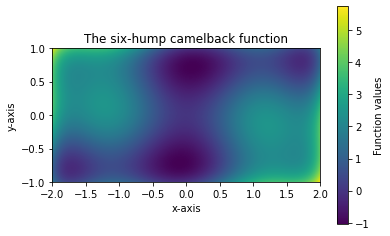

In [ ]:
def six_hump_camelback(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

x = [np.linspace(-2, 2, 10000),np.linspace(-1, 1, 10000)]

X, Y = np.meshgrid(x[0],x[1])
Z = six_hump_camelback([X, Y])

# Plot the function using imshow
pylab.imshow(Z, extent=[-2,2,-1,1])
pylab.colorbar(label='Function values')
pylab.title('The six-hump camelback function')
pylab.xlabel('x-axis')
pylab.ylabel('y-axis')
pylab.show()

Visually, there are 2 global minima. And, the value of the function at these points is -1.


In [ ]:
#What happens for an initial guess of (x,y)=(0,0) ?

# Initialize the optimization
x0 = [0, 0]
res = optimize.minimize(six_hump_camelback, x0)

# Print the results
print('The minimum of the function for an initial guess of (x,y)=(0,0) is :', res.x)
print('The function value minimum of the function for an initial guess of (x,y)=(0,0) is :', res.fun) 

The minimum of the function for an initial guess of (x,y)=(0,0) is : [0. 0.]
The function value minimum of the function for an initial guess of (x,y)=(0,0) is : 0.0


For an initial guess of (x,y)=(0,0) we obtain as a result a local minima.

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

In [ ]:
from scipy.integrate import odeint

#Solve the ODE with odeint over a pariod of 200 time steps

teta0=0
w0=0
Q=2.0
d=1.5
omega=0.65

def derivative(X, time, Q, d,omega): #X=[W,teta]
    return((-1/Q)*X[0]+np.sin(X[1])+d*np.cos(omega*time), X[0])
  
t = np.linspace(0, 100, 200)
Xinit = (w0, teta0)
X = odeint(derivative, Xinit, t, args=(Q,d, omega))

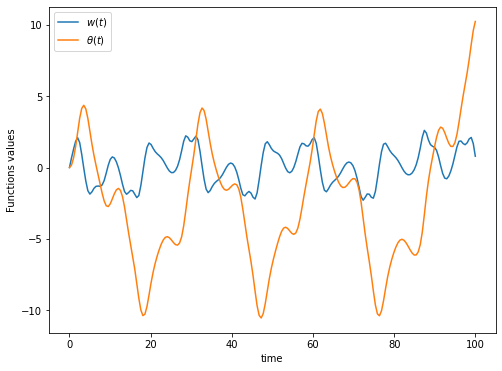

In [ ]:
# plot  θ  and  ω  as functions of the time
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$w(t)$")
plt.plot(t, X[:, 1], label="$θ(t)$")
plt.xlabel('time')
plt.ylabel('Functions values')
plt.legend(loc='best')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [ ]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

In [ ]:
import pandas as pd
df=pd.read_csv('./data/populations.txt',delimiter='\t')
df.head()

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


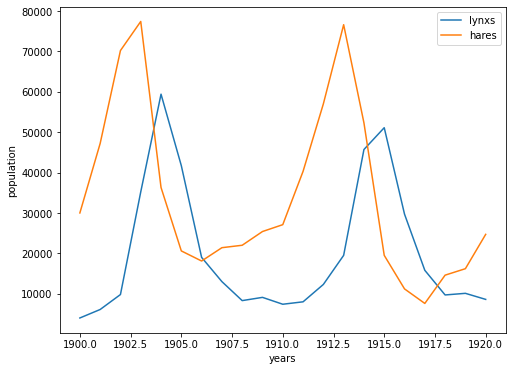

In [ ]:
lynxs=df['lynx']
years=df['# year']
hares=df['hare']
plt.figure(figsize=(8, 6))
plt.plot(years, lynxs, label="lynxs")
plt.plot(years, hares, label="hares")
plt.xlabel('years')
plt.ylabel('population')
plt.legend(loc='best')

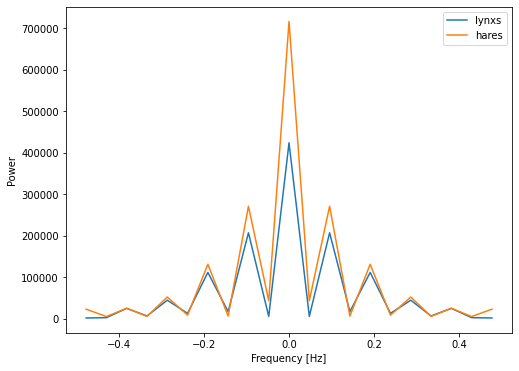

In [ ]:
from scipy import fftpack

# The FFT 
lynxs_fft = fftpack.fft(lynxs.values)
hares_fft = fftpack.fft(hares.values)

# And the power
lynxs_psd = np.abs(lynxs_fft)
hares_psd = np.abs(hares_fft)

# The return the corresponding frequencies
fftfreq_lynxs = fftpack.fftfreq(len(lynxs_psd), 1)
fftfreq_hares = fftpack.fftfreq(len(hares_psd), 1)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(fftpack.fftshift(fftfreq_lynxs), fftpack.fftshift(lynxs_psd), label="lynxs")
plt.plot(fftpack.fftshift(fftfreq_hares), fftpack.fftshift(hares_psd), label="hares")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.legend(loc='best')

In [ ]:
# Calculate the period of population

# Find the peak frequency: focus only on only the positive frequencies
periods=[]
for fftfreq in (fftfreq_lynxs,fftfreq_hares):
  pos_mask = np.where(fftfreq > 0)
  freqs = fftfreq[pos_mask]
  powes = lynxs_psd[pos_mask]

  # find the max of freqs array
  peak_freq = freqs[powes.argmax()]
  
  periods.append(1 / peak_freq)
print("The period of population of lynxs is: ", periods[0], "years")
print("The period of population of hares is: ", periods[1], "years")

The period of population of lynxs is:  10.5 years
The period of population of hares is:  10.5 years


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

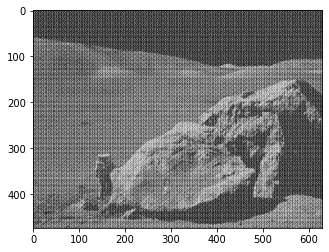

In [ ]:
#Import the image as a 2D numpy array
image=plt.imread("./images/moonlanding.png")

#Examine the image 
plt.imshow(image,plt.cm.gray)

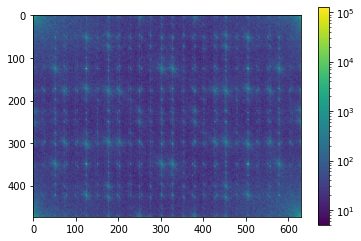

In [ ]:
#Plot the spectrum (Fourier transform of) the image.

from scipy.fftpack import fft2
from matplotlib.colors import LogNorm

image= fft2(image)
plt.imshow(np.abs(image), norm=LogNorm(vmin=5))
plt.colorbar()

Text(0.5, 1.0, 'Filtered Spectrum')

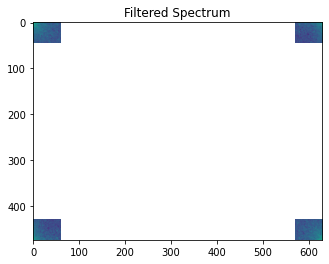

In [ ]:
#Inspect the spectrum, 
#And try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. 

keep_fraction = 0.1 #the fraction of coefficients (in each direction) we keep
im_fft2 = image.copy()
r, c = im_fft2.shape

#Use array slicing to set the noise regions to zero.
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plt.imshow(np.abs(im_fft2),norm=LogNorm(vmin=5))
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

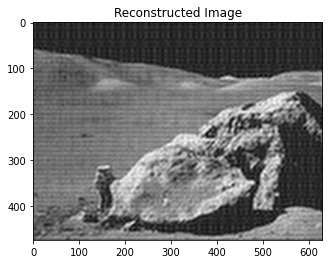

In [ ]:
#Apply the inverse Fourier transform to plot the resulting image.

im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')